In [4]:
# import packages
from statistics import mean
import pandas as pd
from numpy import sqrt
#from xgboost import XGBClassifier


# import Sklearn packages
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 

# Read data
df_features = pd.read_csv("train_features.csv")
df_labels = pd.read_csv("train_labels.csv")
label_subtask1 = ["pid","BaseExcess" ,"Fibrinogen","AST","Alkalinephos","Bilirubin_total","Lactate","TroponinI","SaO2","Bilirubin_direct","EtCO2"]
label_subtask2 = ["Sepsis"]

#print(df_features)
# print(df_features[36:48][label_subtask1])
# print(df_labels.iloc[11])
#xgb = XGBClassifier()
#xgb.fit(X_b_train, D_b_train, early_stopping_rounds=5, eval_set = [(X_b_val, D_b_val)])
#D_hat_b = xgbc_b.predict(X_b_test)


'''

Subtasks:
Task 1:
binary classification, 0,1

'''

'\n\nSubtasks:\nTask 1:\nbinary classification, 0,1\n\n'

In [4]:
#df_features.count()

In [5]:
#df_labels.count()

In [9]:
all_features = ["pid", "Time", "Age", "EtCO2", "PTT", "BUN", "Lactate", "Temp", "Hgb", "HCO3", "BaseExcess", "RRate", "Fibrinogen", "Phosphate", "WBC", "Creatinine", "PaCO2", "AST", "FiO2", "Platelets", "SaO2", "Glucose", "ABPm", "Magnesium", "Potassium", "ABPd", "Calcium", "Alkalinephos", "SpO2", "Bilirubin_direct", "Chloride", "Hct", "Heartrate", "Bilirubin_total", "TroponinI", "ABPs", "pH"]
from sklearn.model_selection import train_test_split

y = df_labels['LABEL_Sepsis']
X = df_features[all_features]
X_filled = X.fillna(X.median())

'''
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_preprocessed_filled = pd.DataFrame()
i = 0
for index, row in X_filled.iterrows():
    if i%10 == 0:
        print(i)
    i = i+1
    pid = row['pid']
    age = row['Age']
    time = int(row['Time'])
    pid_frame = pd.DataFrame({"pid": [pid],"Age": [age]})
    for feat in all_features[3:]:
        new_feat = f"{feat}_{time}"
        new_df = pd.DataFrame({"pid":[pid], new_feat:[row[feat]]})
        #print(new_df)
        pid_frame = pd.merge(pid_frame, new_df, on="pid")
        #pid_frame[new_feat] = row[feat]
    #print(pid_frame)
    X_preprocessed = X_preprocessed.append(pid_frame)

#xgb.fit(df_features, Y, early_stopping_rounds=5)
#Y_pred = xgb.predict(X_b_test)
#print(X)
#print(y)

'''
X_filled[X_filled['pid'] == 1]

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,33.0,32.2,12.0,2.1,36.0,8.7,24.0,...,72.0,100.0,0.3,114.0,24.6,94.0,0.8,0.15,142.0,7.33
1,1,4,34.0,33.0,32.2,17.0,2.1,36.0,10.5,23.9,...,72.0,100.0,0.3,107.0,30.9,99.0,0.8,0.15,125.0,7.33
2,1,5,34.0,33.0,32.2,17.0,2.1,36.0,10.5,23.9,...,72.0,100.0,0.3,107.0,30.9,92.0,0.8,0.15,110.0,7.37
3,1,6,34.0,33.0,32.2,17.0,2.1,37.0,10.5,23.9,...,72.0,100.0,0.3,107.0,30.9,88.0,0.8,0.15,104.0,7.37
4,1,7,34.0,33.0,32.2,17.0,2.1,37.0,10.5,23.9,...,72.0,100.0,0.3,107.0,22.4,81.0,0.8,0.15,100.0,7.41
5,1,8,34.0,33.0,32.2,17.0,2.1,37.0,10.5,23.9,...,72.0,100.0,0.3,107.0,22.4,82.0,0.8,0.15,106.0,7.37
6,1,9,34.0,33.0,32.2,17.0,2.1,37.0,10.5,23.9,...,72.0,100.0,0.3,107.0,30.9,67.0,0.8,0.15,112.0,7.37
7,1,10,34.0,33.0,32.2,17.0,2.1,37.0,10.5,23.9,...,72.0,100.0,0.3,107.0,30.9,62.0,0.8,0.15,121.0,7.37
8,1,11,34.0,33.0,32.2,12.0,2.1,37.0,8.5,26.0,...,72.0,100.0,0.3,111.0,23.8,58.0,0.8,0.15,118.0,7.37
9,1,12,34.0,33.0,32.2,12.0,2.1,38.0,8.5,26.0,...,72.0,100.0,0.3,111.0,23.8,66.0,0.8,0.15,110.0,7.39


In [7]:
X_filled.count()

pid                 227940
Time                227940
Age                 227940
EtCO2               227940
PTT                 227940
BUN                 227940
Lactate             227940
Temp                227940
Hgb                 227940
HCO3                227940
BaseExcess          227940
RRate               227940
Fibrinogen          227940
Phosphate           227940
WBC                 227940
Creatinine          227940
PaCO2               227940
AST                 227940
FiO2                227940
Platelets           227940
SaO2                227940
Glucose             227940
ABPm                227940
Magnesium           227940
Potassium           227940
ABPd                227940
Calcium             227940
Alkalinephos        227940
SpO2                227940
Bilirubin_direct    227940
Chloride            227940
Hct                 227940
Heartrate           227940
Bilirubin_total     227940
TroponinI           227940
ABPs                227940
pH                  227940
d

In [6]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,
#...                            n_informative=2, n_redundant=0,
#.#..                            random_state=0, shuffle=False)
#c##lf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X, y)

In [8]:
import matplotlib.pyplot as plt
df_features.mean()
for feat in all_features:
    print(feat)
    #print(sorted(X_filled[feat].dropna())[:100])
    #plt.plot(sorted(X_filled[feat].dropna()))
    #plt.show()

pid
Time
Age
EtCO2
PTT
BUN
Lactate
Temp
Hgb
HCO3
BaseExcess
RRate
Fibrinogen
Phosphate
WBC
Creatinine
PaCO2
AST
FiO2
Platelets
SaO2
Glucose
ABPm
Magnesium
Potassium
ABPd
Calcium
Alkalinephos
SpO2
Bilirubin_direct
Chloride
Hct
Heartrate
Bilirubin_total
TroponinI
ABPs
pH


In [11]:
#features: min,max,med,std
#data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
data = {'pid':[], 'Age':[]}
max_pid = X_filled['pid'].max()
feats = all_features[3:]
print("max: ",max_pid)
for feat in feats:
        feat_min_name = f"{feat}_min"
        feat_max_name = f"{feat}_max"
        feat_med_name = f"{feat}_med"
        feat_std_name = f"{feat}_std"
        data[feat_min_name] = []
        data[feat_max_name] = []
        data[feat_med_name] = []
        data[feat_std_name] = []
for i in set(X_filled['pid']):
    if i%100 ==0:
        print(i)
    pid = i
    data['pid'].append(i)
    age = int(X_filled[X_filled["pid"] == i]['Age'].min())
    data['Age'].append(age)
    #print(age)
    for feat in feats:
        feat_min_name = f"{feat}_min"
        data[feat_min_name].append(X_filled[X_filled["pid"] == i][feat].min())
        feat_max_name = f"{feat}_max"
        data[feat_max_name].append(X_filled[X_filled["pid"] == i][feat].max())
        feat_med_name = f"{feat}_med"
        data[feat_med_name].append(X_filled[X_filled["pid"] == i][feat].median())
        feat_std_name = f"{feat}_std"
        data[feat_std_name].append(X_filled[X_filled["pid"] == i][feat].std())
#print(data)

#for i in range(100):
#    plt.plot(X_filled[X_filled["pid"] == i][all_features[3:]])
#    plt.show()

max:  31658
100
200
300
400
500
700
800
900
1000
1300
1400
1500
1600
1900
2000
2200
2400
2500
2600
2700
2900
3000
3100
3200
3300
3500
3700
3900
4100
4200
4400
4500
4600
4700
5000
5200
5300
5500
5700
6100
6500
6700
6800
6900
7000
7100
7300
7400
7500
7600
7700
7900
8000
8100
8300
8500
8800
9100
9200
9300
9500
9600
9900
10000
10200
10300
10400
10600
10700
10800
10900
11000
11300
11700
11800
11900
12000
12100
12200
12500
12600
12700
12900
13100
13200
13400
13600
14000
14200
14700
14900
15100
15200
15400
15600
15800
15900
16000
16100
16300
16400
16800
16900
17100
17200
17400
17500
17600
17700
17800
18000
18200
18600
18700
18800
19200
19400
19500
19600
19900
20000
20100
20200
20300
20400
20600
20700
20800
20900
21000
21200
21500
21600
21700
21800
21900
22000
22100
22300
22700
22800
23000
23300
23700
23800
24000
24100
24200
24300
24400
24500
24600
25100
25200
25400
25600
25900
26000
26100
26200
26700
26800
27000
27200
27400
27500
27700
27900
28100
28200
28500
28700
28800
28900
29000
29100
292

In [8]:
X_engineered = pd.DataFrame.from_dict(data)

NameError: name 'data' is not defined

In [103]:
X_engineered

,pid,Age,EtCO2_min,EtCO2_max,EtCO2_med,EtCO2_std,PTT_min,PTT_max,PTT_med,PTT_std,...,TroponinI_med,TroponinI_std,ABPs_min,ABPs_max,ABPs_med,ABPs_std,pH_min,pH_max,pH_med,pH_std
0,1,34,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,100.0,142.0,111.0,12.086807,7.33,7.41,7.37,2.256304e-02
1,2,86,33.0,33.0,33.0,0.0,31.8,32.2,32.2,1.154701e-01,...,0.15,8.371579e-02,119.0,148.0,128.0,8.860878,7.37,7.37,7.37,9.276721e-16
2,4,66,33.0,33.0,33.0,0.0,32.2,34.6,32.2,6.928203e-01,...,0.15,3.752777e-02,86.0,168.0,121.5,29.626335,7.37,7.37,7.37,9.276721e-16
3,6,66,33.0,33.0,33.0,0.0,32.2,53.8,32.2,6.235383e+00,...,0.15,2.898975e-17,94.0,110.0,99.0,5.773503,7.33,7.39,7.37,1.758098e-02
4,8,42,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.020726e-02,119.0,239.0,206.5,35.922792,7.37,7.37,7.37,9.276721e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18990,31653,52,33.0,33.0,33.0,0.0,25.8,32.2,32.2,1.847521e+00,...,0.15,2.898975e-17,75.0,119.0,107.5,17.288111,7.33,7.37,7.37,1.556998e-02
18991,31654,66,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,119.0,187.0,160.0,17.028497,7.37,7.37,7.37,9.276721e-16
18992,31656,44,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,88.0,120.0,103.0,12.405705,7.25,7.37,7.37,4.097301e-02
18993,31657,70,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,101.0,124.0,111.0,7.089792,7.37,7.37,7.37,9.276721e-16


In [104]:
y

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [2]:
X_picklename = "X_engineered_v2-incl-std.pkl"
#X_engineered.to_pickle(X_picklename)

In [10]:
from sklearn.svm import SVC
X_engineered = pd.read_pickle(X_picklename)
X_train, X_test, y_train, y_test = train_test_split(X_engineered, y, test_size=0.2)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.4)
#results = {}
#for kernel in ('linear', 'poly', 'rbf'):
#    clf = SVC(kernel=kernel, gamma=2)
#    clf.fit(X_train, y_train)
#    print(kernel)
#    results[kernel] = clf.predict(y_test)
#    #print(clf.predict(y_test))

#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#clf.fit(X_train, y_train)
#score = clf.score(X_test, y_test)

#from sklearn.neighbors import KNeighborsClassifier
#neigh = KNeighborsClassifier(n_neighbors=3)
#neigh.fit(X_train, y_train)
#y_pred = neigh.predict(X_test)

import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
#clf = make_pipeline(StandardScaler(),
#                    SGDClassifier(max_iter=2000, tol=1e-3))
#clf.fit(X_train, y_train)

#clf = SVC(kernel='linear', gamma=2)
#clf.fit(X_train, y_train)

#print("sum: ", sum(y_test))
#y_pred = clf.predict(X_test)
#print("diff: ", sum(abs(y_pred-y_test)))
from sklearn.metrics import classification_report
#print(classification_report(y_pred,y_test))
#from sklearn.multioutput import MultiOutputRegressor
#clf = MultiOutputRegressor(Ridge(random_state=100)).fit(X_train, y_train)

# Get predictions for test data
#y_test_pred = clf.predict(X_test)
#computing the R2 score:
#clf.score(X_test, y_test)
#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#print(classification_report(y_pred, y_test))

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/lucaentremont/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
X_test

,pid,Age,EtCO2_min,EtCO2_max,EtCO2_med,EtCO2_std,PTT_min,PTT_max,PTT_med,PTT_std,...,TroponinI_med,TroponinI_std,ABPs_min,ABPs_max,ABPs_med,ABPs_std,pH_min,pH_max,pH_med,pH_std
17149,28582,68,33.0,33.0,33.0,0.0,28.5,32.2,32.2,1.086278e+00,...,0.15,2.898975e-17,89.0,124.0,98.0,11.049476,7.37,7.37,7.37,9.276721e-16
3397,5587,78,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,106.0,182.0,129.5,20.462086,7.05,7.37,7.37,9.237604e-02
3494,5759,85,33.0,33.0,33.0,0.0,32.2,48.0,32.2,4.561067e+00,...,0.15,2.898975e-17,90.0,127.0,103.0,12.724053,7.37,7.37,7.37,9.276721e-16
939,1594,83,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,99.0,124.0,111.0,7.969639,7.37,7.37,7.37,9.276721e-16
6126,10150,31,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,84.0,119.0,92.0,11.424323,7.37,7.37,7.37,9.276721e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16746,27931,63,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,119.0,201.0,189.5,23.863723,7.37,7.37,7.37,9.276721e-16
12545,20897,53,33.0,33.0,33.0,0.0,32.2,36.5,32.2,1.241303e+00,...,0.15,2.898975e-17,102.0,121.0,108.5,6.386539,7.31,7.45,7.37,3.018880e-02
1749,2908,83,33.0,33.0,33.0,0.0,32.2,32.2,32.2,7.421377e-15,...,0.15,2.898975e-17,84.0,119.0,98.5,10.660036,7.35,7.37,7.37,5.773503e-03
853,1443,39,33.0,33.0,33.0,0.0,27.6,32.2,32.2,1.477380e+00,...,0.15,2.898975e-17,115.0,135.0,127.0,5.401319,7.37,7.37,7.37,9.276721e-16


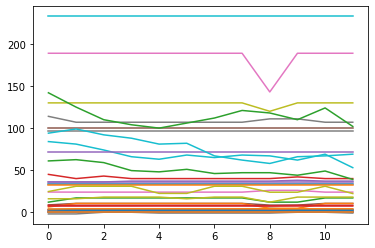

In [40]:
a = X_filled[X_filled['pid'] == 1][all_features[3:]]
plt.plot(a)


In [17]:
import numpy as np
from xgboost import XGBClassifier
xg = XGBClassifier()
X_train_np = np.array(X_train.loc[:, df.columns != 'b'])
y_train_np = np.array(y_train.drop('pid', axis=1))
X_eval_np = np.array(X_eval)
y_eval_np = np.array(y_eval)
X_train

#xg.fit(X_train_np, y_train_np, eval_metric="auc", early_stopping_rounds=5, eval_set=[(X_eval_np, y_eval_np)])

KeyError: "['pid'] not found in axis"

In [15]:
y_test_np = np.array(y_test)
X_test_np = np.array(X_test)
y_pred = xg.predict(X_test_np)
print(sum(y_pred))
print(sum(y_test_np))

XGBoostError: need to call fit or load_model beforehand

In [21]:
print(classification_report(y_pred, y_test_np))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      3796
         1.0       0.00      0.00      0.00         3

    accuracy                           0.94      3799
   macro avg       0.50      0.47      0.48      3799
weighted avg       1.00      0.94      0.97      3799



In [37]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train_np, y_train_np)

# predict on test set
y_pred = rfc.predict(X_test_np)
print(classification_report(y_pred, y_test_np))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      3793
         1.0       0.00      0.00      0.00         6

    accuracy                           0.94      3799
   macro avg       0.50      0.47      0.48      3799
weighted avg       1.00      0.94      0.97      3799



In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_train_rfc, y_train_rfc = make_classification(n_samples=X_train.shape[0], n_features=X_train.shape[1])
clf = RandomForestClassifier(max_depth=5,class_weight="balanced",n_estimators=200)
clf.fit(X_train_rfc, y_train_rfc)
y_pred = clf.predict(X_test)

In [132]:
sum(y_pred)

3734

In [133]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
print(auc)

0.5001237867125329


In [134]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train, y_train))

lsvc = LinearSVC(C=1.0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [135]:
auc = roc_auc_score(y_test,y_pred)
print(auc)

0.5
